In [847]:
import os
import pandas as pd
import io
import numpy as np
import plotnine
from plotnine import *
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [848]:
df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

In [849]:
df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

In [850]:
columns = df.columns.tolist()

numcolumns = ['Age','Total years of experience', 'Years of experience in Germany',
            'Yearly brutto salary (without bonus and stocks) in EUR',
            'Yearly bonus + stocks in EUR',
            'Number of vacation days',
            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
            'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

txtcolumns = ['Gender', 'City','Position ', 'Seniority level',
              'Your main technology / programming language',
              'Employment status',
              'Сontract duration',
              'Main language at work',
              'Company size', 'Company type',
              'Have you lost your job due to the coronavirus outbreak?']

In [851]:
dictionary1 = {}

for col in columns:
    avg = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].mean().to_frame()
    sd = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].std().to_frame()
    n = df[col].value_counts()
    statdf = pd.concat([avg,sd,n], axis=1)
    statdf = statdf.reset_index()
    statdf.columns = [col,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary1[col] = statdf
    dictionary1[col]
    
def getindex(colname, value):
    return pd.Index(df[colname]).get_loc(value)
    
def indivcleaner(colname,lookup,replacement):
    df.iloc[getindex(colname, lookup)] = df.iloc[getindex(colname, lookup)].replace(lookup, replacement)

In [852]:
dictionary2 = {}

def stat_table(dataf,xcol,ycol):
    avg = dataf.groupby(xcol)[ycol].mean().to_frame()
    sd = dataf.groupby(xcol)[ycol].std().to_frame()
    n = dataf[xcol].value_counts()
    statdf2 = pd.concat([avg,sd,n], axis=1)
    statdf2 = statdf2.reset_index()
    statdf2.columns = [xcol,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary2[xcol] = statdf2
    dictionary2[xcol]

In [853]:
def wagebox(colname):
    print(ggplot(df, aes(x=colname, y = wage)) + geom_boxplot() + ylab('Yearly Salary'))
    
def wageplot(colname):
    print(ggplot(df, aes(x=colname, y = wage)) + geom_point() + ylab('Yearly Salary'))
    
pd.set_option('display.max_rows', None)

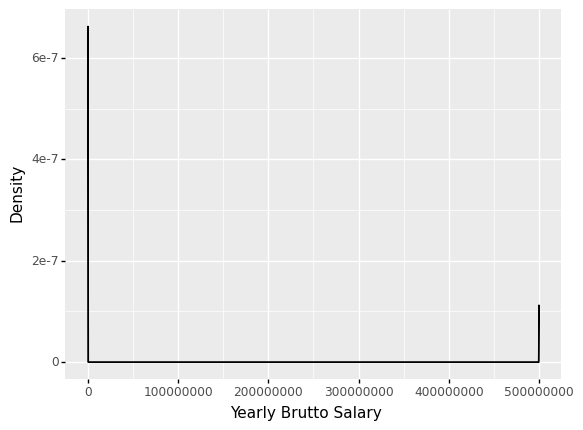

<ggplot: (8772470640842)>

In [854]:
# This density curve is extremely important for analyzing yearly salary against any other variable if outliers
# or unexpected outcomes occur. If conclusions are going to be drawn assumptions are going to be made about
# appropiate replacements then understanding how this variable is distributed is key.

# This curve will be updated throughout as outliers are handled to reasses assumptions about the data

densityplot = ggplot(df, aes(x = wage)) + geom_density() + ylab('Density') + xlab('Yearly Brutto Salary')

densityplot

In [855]:
# Analysis

# There is overwhelming evidence of outliers. Although good estimates can be made with this chart, it is perhaps more
# accurate to find them using a table or a more precise plot

In [856]:
dictionary1['Gender']

,Gender,Mean,Standard Deviation,Sample Size
0,Diverse,144500,20506,2
1,Female,3412711,40956897,149
2,Male,73808,35027,888


In [857]:
# Analysis

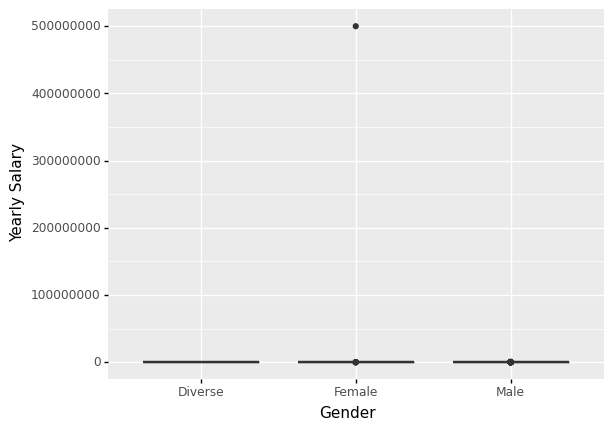

In [858]:
wagebox('Gender')

In [859]:
# Clearly there are outliers from mis-inputs that need to be replaced with a median as the data is skewed to the left

wagemedian = df[wage].median()

In [860]:
# Analysis

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

#indivcleaner(wage, 300000, wagemedian)

dictionary1 = {}

for col in columns:
    avg = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].mean().to_frame()
    sd = df.groupby(col)['Yearly brutto salary (without bonus and stocks) in EUR'].std().to_frame()
    n = df[col].value_counts()
    statdf = pd.concat([avg,sd,n], axis=1)
    statdf = statdf.reset_index()
    statdf.columns = [col,'Mean', 'Standard Deviation', 'Sample Size']
    dictionary1[col] = statdf
    dictionary1[col]

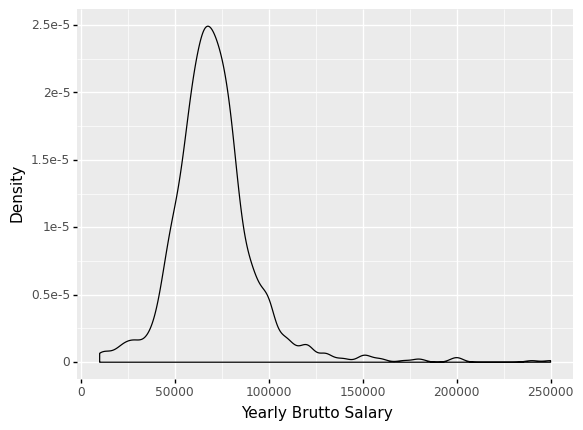

<ggplot: (8772470640842)>

In [861]:
densityplot

In [862]:
# There is a notorious improvement in distribution. At this point it is more ambiguous whether there are further outliers
# or if this is the "correct" distribution for this sample

In [863]:
dictionary1['Gender']

,Gender,Mean,Standard Deviation,Sample Size
0,Diverse,144500,20506,2
1,Female,57476,14153,149
2,Male,72929,23386,888


In [864]:
# Analysis

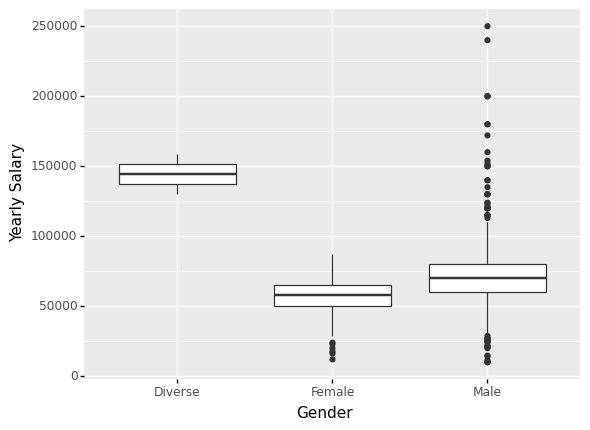

In [865]:
wagebox('Gender')

In [866]:
# Analysis

In [867]:
dictionary1['Age']

,Age,Mean,Standard Deviation,Sample Size
0,20,240000,NaN,1
1,22,50250,46638,8
2,23,54225,13958,11
3,24,50845,22549,23
4,25,59416,15552,38
5,26,63183,25265,51
6,27,58514,17181,51
7,28,62169,14437,72
8,29,68559,17871,76
9,30,67628,19811,91


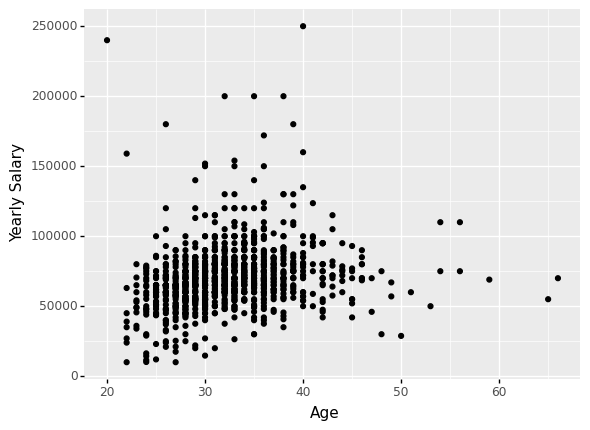

In [868]:
wageplot('Age')

In [869]:
# Analysis

In [870]:
# Grouping age into buckets can help analysis

twenty = [20,22,23,24,25,26,27,28,29]

thirty = [30,31,32,33,34,35,36,37,38,39]

fourty = [40,41,42,43,44,45,46,47,48,49]

fiftyplus = [50,51,53,54,56,59,65,66]


for i in twenty:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '20s')
    
for i in thirty:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '30s')

for i in fourty:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '40s')
    
for i in fiftyplus:
    df.iloc[getindex('Age', i)] = df.iloc[getindex('Age', i)].replace(i, '>50')

In [871]:
stat_table(df,'Age',wage)

dictionary2['Age']

,Age,Mean,Standard Deviation,Sample Size
0,20s,62112,22243,331
1,30s,74715,21582,610
2,40s,77000,27585,88
3,>50,70280,25106,10


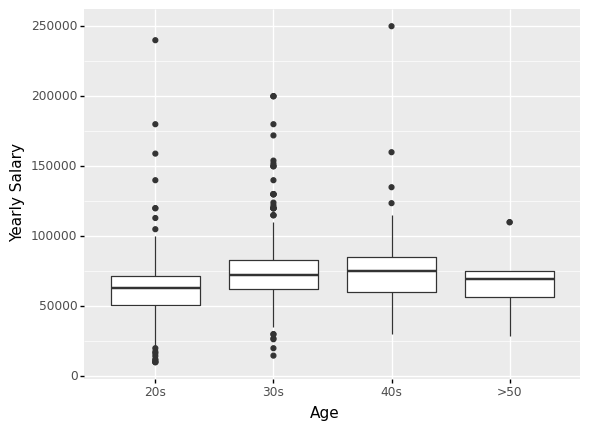

In [872]:
wagebox('Age')

In [873]:
# Analysis

In [874]:
# Dataframe needs to be reloaded to revert age changes

df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

In [875]:
dictionary1['City']

,City,Mean,Standard Deviation,Sample Size
0,Aachen,40082,42310,2
1,Amsterdam,77142,18682,6
2,Ansbach,42000,NaN,1
3,Barcelona,31000,12728,2
4,Berlin,73010,21802,566
5,Bielefeld,55000,NaN,1
6,Bodensee,81000,NaN,1
7,Boeblingen,57000,11533,3
8,Bonn,54233,1504,3
9,Braunschweig,75000,NaN,1


In [876]:
# Analysis

In [877]:
# The majority of the cities recorded have small sizes (including some with just 1 entry)

# This makes data analysis unreliable so only those with the largest sample sizes should be looked at

majorcities = dictionary1['City'].sort_values('Sample Size', ascending = False).head(5)

majorcities

,City,Mean,Standard Deviation,Sample Size
4,Berlin,73010,21802,566
51,Munich,76112,20980,204
24,Frankfurt,63097,18012,35
26,Hamburg,62799,21593,34
69,Stuttgart,64438,12439,24


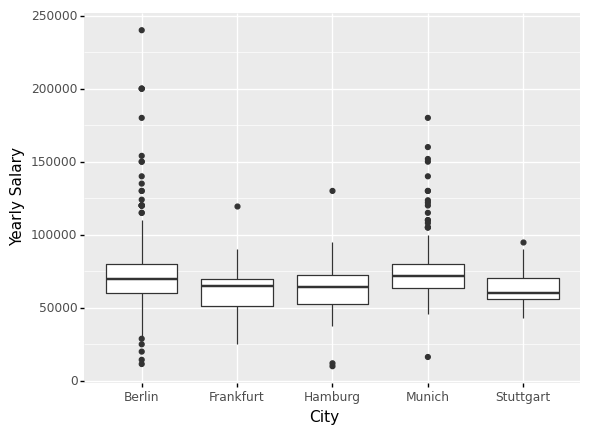

<ggplot: (8772497763856)>

In [878]:
majorcitiesplot = df.loc[df['City'].isin(['Berlin','Munich','Frankfurt','Hamburg','Stuttgart'])]

ggplot(majorcitiesplot, aes(x='City', y = wage)) + geom_boxplot() + ylab('Yearly Salary')

In [879]:
# Analysis

In [880]:
dictionary1['Total years of experience']

,Total years of experience,Mean,Standard Deviation,Sample Size
0,0,38915,17123,8
1,1,51570,30877,27
2,2,51554,12897,56
3,3,53637,18590,56
4,4,58364,14641,71
5,5,67092,24227,115
6,6,71418,20429,88
7,7,69310,13945,71
8,8,69117,15388,75
9,9,75882,14277,52


In [881]:
# Analysis

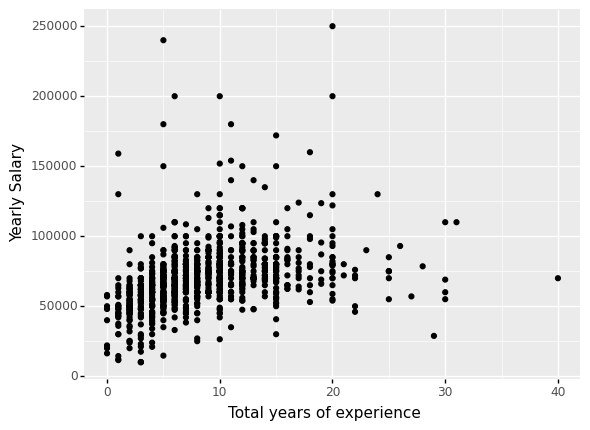

In [882]:
wageplot('Total years of experience')

In [883]:
# Analysis

In [884]:
# The same process that was done for Age entries can be done here

lessthanten = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
       
ten = [10,11,12,13,14,15,16,17,18,19]
    
twenty = [20,21,22,23,24,25,26,27,28,29]

thirty = [30,31]

fourty = [40]


c = 'Total years of experience'


for i in lessthanten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '0-10')

for i in ten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '10-19')

for i in twenty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '20-29')
    
for i in thirty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '30-39')

for i in fourty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '40')

In [885]:
stat_table(df,c,wage)

dictionary2[c]

,Total years of experience,Mean,Standard Deviation,Sample Size
0,0-10,64280,20436,619
1,10-19,80066,21347,372
2,20-29,84907,38034,42
3,30-39,80800,27124,5
4,40,70000,NaN,1


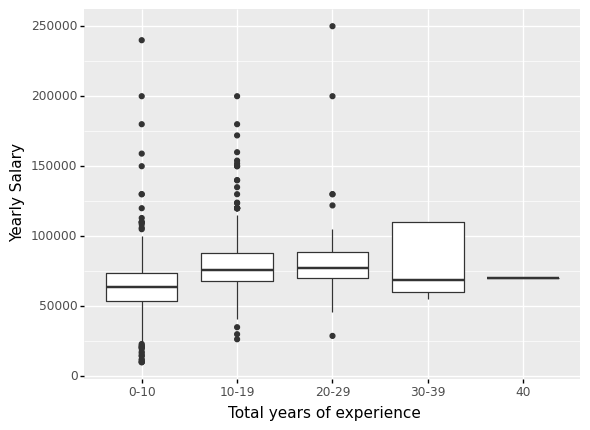

<ggplot: (8772467158507)>

In [886]:
ggplot(df, aes(x = c, y = wage)) + geom_boxplot() + ylab('Yearly Salary')

In [887]:
# Analysis

In [888]:
# Dataframe needs to be reloaded to revert age changes

df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

In [889]:
dictionary1['Years of experience in Germany']

,Years of experience in Germany,Mean,Standard Deviation,Sample Size
0,0,57216,30054,114
1,1,63132,17709,164
2,2,67154,21257,200
3,3,69239,14225,131
4,4,76529,23483,121
5,5,77351,15805,123
6,6,84854,24630,60
7,7,82365,32056,34
8,8,82783,23326,12
9,9,92573,32165,14


In [890]:
# Analysis

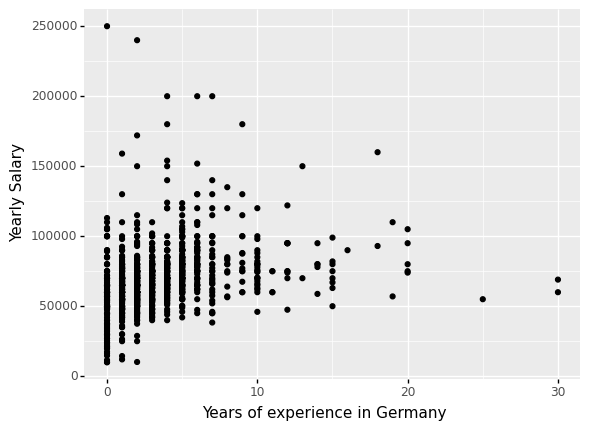

In [891]:
wageplot('Years of experience in Germany')

In [892]:
# Analysis

In [893]:
# The same process that was done for Age entries can be done here

lessthanten = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
       
ten = [10,11,12,13,14,15,16,18,19]
    
twenty = [20,25]

thirty = [30]


c = 'Years of experience in Germany'


for i in lessthanten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '0-10')

for i in ten:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '10-19')

for i in twenty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '20-29')
    
for i in thirty:
    df.iloc[getindex(c, i)] = df.iloc[getindex(c, i)].replace(i, '30')

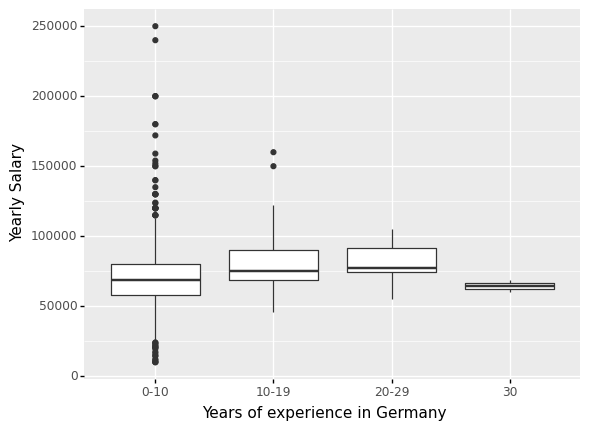

<ggplot: (8772465485623)>

In [894]:
ggplot(df, aes(x = c, y = wage)) + geom_boxplot() + ylab('Yearly Salary')

In [895]:
# Analysis

In [896]:
# Dataframe needs to be reloaded to revert age changes

df = pd.read_csv('/Users/nicomontenegrob/Documents/NYU/Data Bootcamp/Clean_df.csv')

df = df.iloc[:,1:len(df)]

wage = 'Yearly brutto salary (without bonus and stocks) in EUR'

indivcleaner(wage, 500000000, wagemedian)

indivcleaner(wage, 850000, wagemedian)

In [897]:
dictionary1['Seniority level']

,Seniority level,Mean,Standard Deviation,Sample Size
0,C-Level,155000,42720,3
1,Intern,21430,9340,4
2,Junior,47730,12717,68
3,Lead,91163,28526,169
4,Middle,58938,13952,307
5,No level,58750,15910,2
6,Senior,74614,17836,485
7,Student,12000,NaN,1


In [898]:
# Analysis

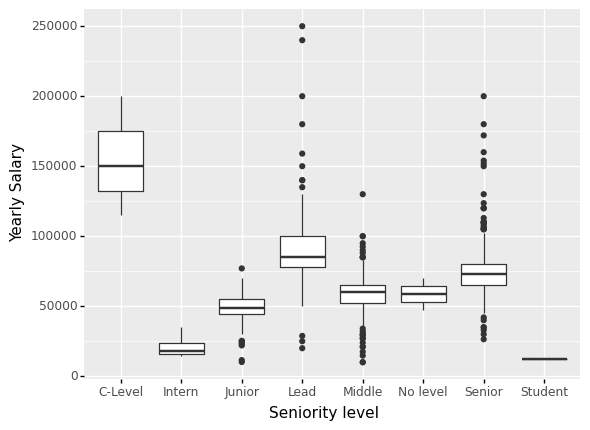

In [899]:
wagebox('Seniority level')

In [900]:
# Analysis

In [901]:
c = 'Your main technology / programming language'

len(dictionary1[c])

102

In [902]:
# Due to the diversity of the entries, it is better to segment the data to spot clearer trends

codehigh = dictionary1[c].sort_values('Mean', ascending = False).head(8)

codehigh

,Your main technology / programming language,Mean,Standard Deviation,Sample Size
20,Cobol,159000,NaN,1
61,Pegasystems Platform,140000,NaN,1
87,Spring,135000,NaN,1
9,Autonomous Driving,123600,NaN,1
19,Cloud,109000,39154,3
86,Spark,108333,62115,3
88,Sre,105000,NaN,1
7,Apachespark,100000,NaN,1


In [903]:
codelow = dictionary1[c].sort_values('Mean', ascending = False).tail(8)

codelow

,Your main technology / programming language,Mean,Standard Deviation,Sample Size
68,Ps,45000,NaN,1
29,Figma,45000,0,2
85,Sketch,42000,NaN,1
98,Web,39000,16971,2
92,Tricentis Tosca,32000,NaN,1
8,Apotheker,30000,NaN,1
32,Gcp,30000,NaN,1
28,Fbd,30000,NaN,1


In [904]:
# Analysis

In [905]:
codemid = dictionary1[c].sort_values('Sample Size', ascending = False).head(10)

codemid

,Your main technology / programming language,Mean,Standard Deviation,Sample Size
37,Java,72219,22296,201
69,Python,68927,22625,199
38,Javascript,66406,17709,87
63,Php,63846,18029,68
14,C,73137,29988,55
15,C#,70555,35262,31
94,Typescript,82836,20668,29
89,Swift,74510,35359,29
84,Scala,84574,22802,27
45,Kotlin,74731,12453,26


In [906]:
codemean = dictionary1[c]['Mean'].mean()

round(codemean)

71245

In [907]:
# Analysis

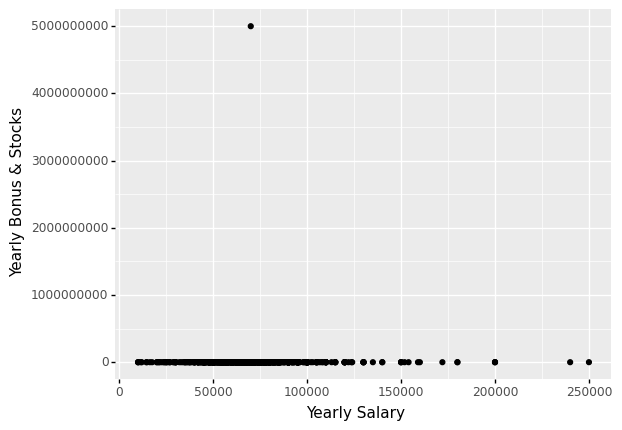

<ggplot: (8772495460883)>

In [908]:
c = 'Yearly bonus + stocks in EUR'

ggplot(df, aes(x= wage, y = c)) + geom_point() + xlab('Yearly Salary') + ylab('Yearly Bonus & Stocks')

In [909]:
# Just by looking at the a plot there clearly is an outlier 

# This intuitively is also an erroneous response judging by the other columns for the same row since it is in the same 

# row where yearly was previously replaced with the median wage.

bonusmedian = df[c].median()

indivcleaner(c, 5000000000, bonusmedian)

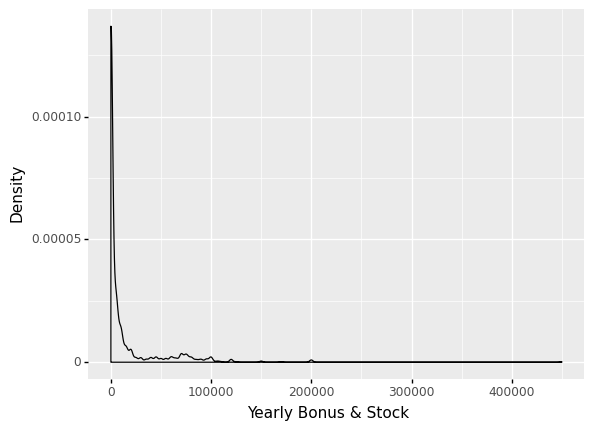

<ggplot: (8772495111662)>

In [910]:
ggplot(df, aes(x = c)) + geom_density() + ylab('Density') + xlab('Yearly Bonus & Stock')

In [911]:
# Density plot supports using median()

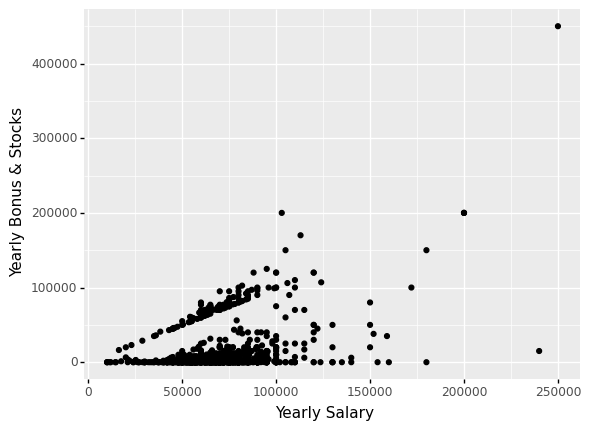

<ggplot: (8772495639694)>

In [912]:
ggplot(df, aes(x= wage, y = c)) + geom_point() + xlab('Yearly Salary') + ylab('Yearly Bonus & Stocks')

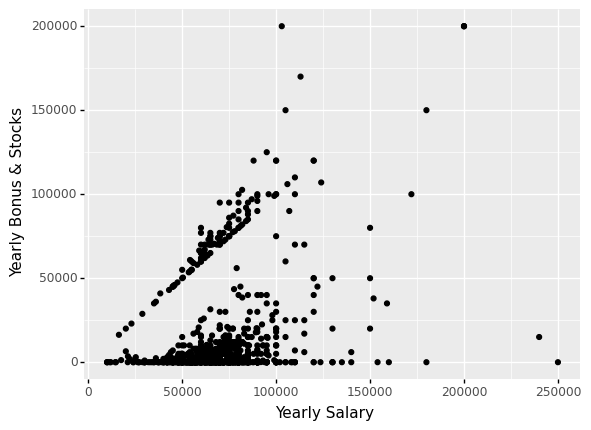

<ggplot: (8772496145086)>

In [913]:
# The data point at 450,000 bonus & stock can also be removed to study the trend in the vast majority of the data

indivcleaner(c, 450000, bonusmedian)

ggplot(df, aes(x= wage, y = c)) + geom_point() + xlab('Yearly Salary') + ylab('Yearly Bonus & Stocks')

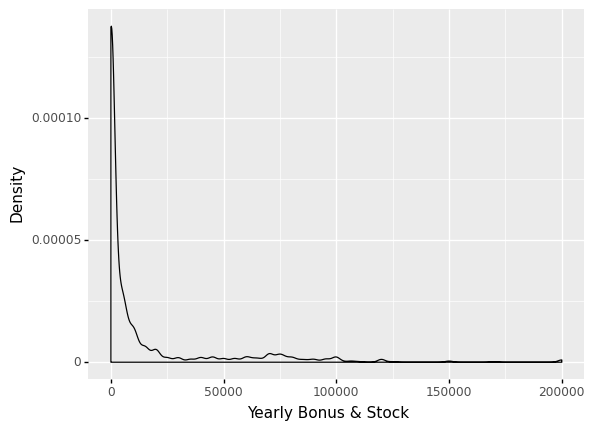

<ggplot: (8772465396282)>

In [914]:
ggplot(df, aes(x = c)) + geom_density() + ylab('Density') + xlab('Yearly Bonus & Stock')

In [915]:
# Analysis

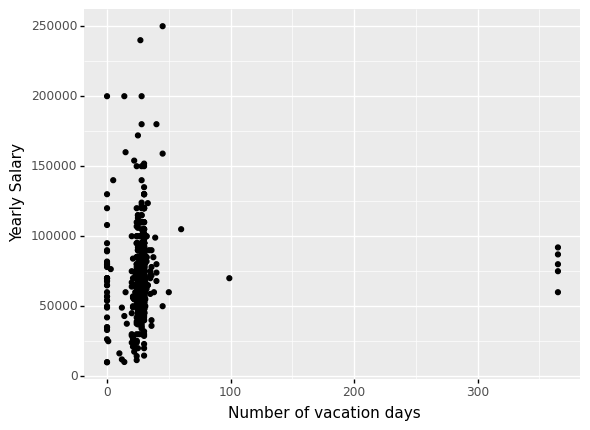

In [916]:
c = 'Number of vacation days'

wageplot(c)

In [917]:
# Although the the data points on the right are not outliers, dropping them to 1) analyze those three separately
# and 2) plot the rest can provide richer conclusions

limited_vacations = df.loc[df[c] != 365]

unlimited_vacations = df.loc[df[c] == 365]

wagemean = df[wage].mean() # This calculation has outliers/errors replaced so using mean() is appropiate

wagemean

70850.8480558229

In [918]:
print('Difference between mean and median wage: ',round(((wagemean - wagemedian)*100/wagemedian),2),'%', sep = '')

Difference between mean and median wage: 1.22%


In [919]:
# Additionally the difference between mean and median is negligeble with the current distribution

In [920]:
print('Difference between mean and median wage: ',round(((unlimited_vacations[wage].mean() - wagemean)*100/wagemean),2),'%', sep = '')

Difference between mean and median wage: 11.22%


In [921]:
# Analysis

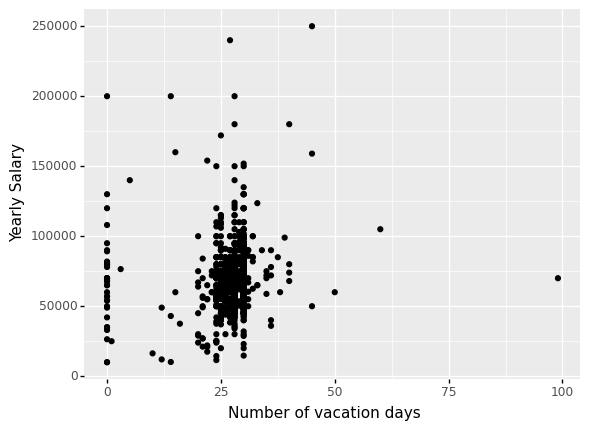

<ggplot: (8772494878699)>

In [922]:
ggplot(limited_vacations, aes(x= c, y = wage)) + geom_point() + xlab(c) + ylab('Yearly Salary')

In [923]:
# Analysis

In [924]:
dictionary1['Employment status']

,Employment status,Mean,Standard Deviation,Sample Size
0,Founder,67500,45962,2
1,Full-time,70600,21039,1006
2,Intern,18225,11255,4
3,Part-time,34498,26512,6
4,Self-employed,103591,56597,21


In [925]:
# Analysis

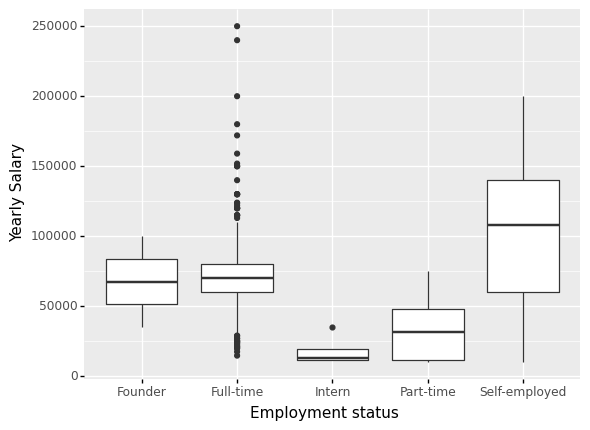

In [926]:
wagebox('Employment status')

In [927]:
# Analysis

In [928]:
dictionary1['Main language at work']

,Main language at work,Mean,Standard Deviation,Sample Size
0,Bilingual,72000,31488,5
1,Czech,21120,NaN,1
2,English,72304,22620,859
3,French,80000,NaN,1
4,German,66080,23609,157
5,Italian,37600,12350,3
6,Polish,27000,NaN,1
7,Russian,46346,23040,9
8,Spanish,37333,6429,3


In [929]:
# Analysis

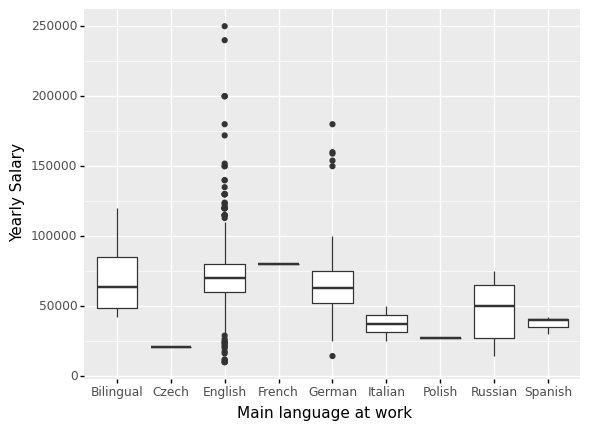

In [930]:
wagebox('Main language at work')

In [931]:
# Analysis

In [932]:
dictionary1['Company size']

,Company size,Mean,Standard Deviation,Sample Size
0,1000+,75720,24473,373
1,101-1000,70734,18460,344
2,11-50,66037,24167,146
3,51-100,65676,18591,126
4,up to 10,62422,37742,50


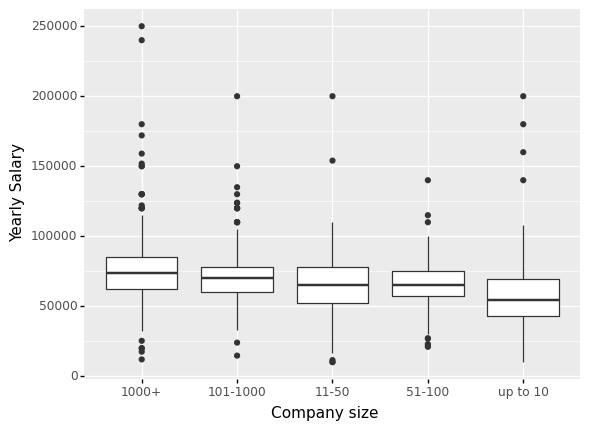

In [933]:
wagebox('Company size')

In [934]:
dictionary1['Have you lost your job due to the coronavirus outbreak?']

,Have you lost your job due to the coronavirus outbreak?,Mean,Standard Deviation,Sample Size
0,No,70493,21630,984
1,Yes,77245,41777,55


In [935]:
# Analysis

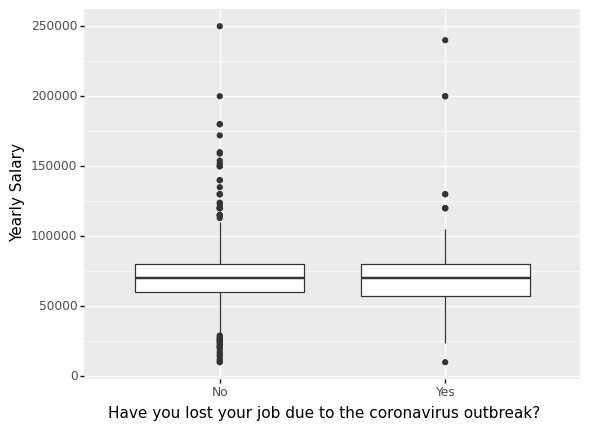

In [936]:
wagebox('Have you lost your job due to the coronavirus outbreak?')

In [937]:
# Analysis